**Run the two cells below before you begin. These will set the notebook to autosave every 10 seconds, import the necessary libraries for this challenge, and set figure appearance.**

In [8]:
%autosave 100

Autosaving every 100 seconds


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#mpl.rcParams['figure.dpi'] = 400
#mpl.rcParams['font.size'] = 4

**To begin, import data set `cleaned_data.csv` and create lists of feature names for the remaining financial features: `'BILL_AMT1'`, `'BILL_AMT2'`, `'BILL_AMT3'`, `'BILL_AMT4'`, `'BILL_AMT5'`, `'BILL_AMT6'`,  `'PAY_AMT1'`, `'PAY_AMT2'`, `'PAY_AMT3'`, `'PAY_AMT4'`, `'PAY_AMT5'`, and `'PAY_AMT6'`.**

**Name the features `bill_feats` and `pay_amt_feats`, respectively.**

In [10]:
# Import the dataset
df=pd.read_csv('cleaned_data.csv',index_col=[0])

In [12]:
# Create lists `bill_feats` and `pay_amt_feats`
bill_feats=[x for x in df.columns if x.startswith('B')]
pay_amt_feats=[x for x in df.columns if x.startswith('P')][6:]

____________________________________________________________________________________
**Next, use `.describe()` to examine statistical summaries of the bill amount features**


In [17]:
df[bill_feats].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,51405.730723,49300.001500,47026.340047,43338.894539,40338.136701,38889.872337
std,73633.687106,70934.549534,68705.359524,64275.250740,60705.944083,59432.541657
min,-165580.000000,-69777.000000,-157264.000000,-170000.000000,-81334.000000,-339603.000000
25%,3580.000000,2999.750000,2627.250000,2341.750000,1745.000000,1256.000000
50%,22361.000000,21150.000000,20079.500000,19037.000000,18066.000000,17005.000000
75%,67649.750000,64395.500000,60360.000000,54727.500000,50290.500000,49253.750000
max,746814.000000,671563.000000,855086.000000,706864.000000,823540.000000,699944.000000


Reflect on what you see. Does it make sense?

___________________________________________________________________________________
**Then you should visualize the bill amount features using a 2 by 3 grid of histogram plots.**
> Hint: You can use 20 bins for this visualization.

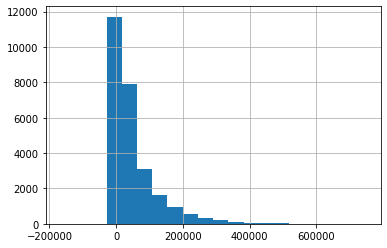

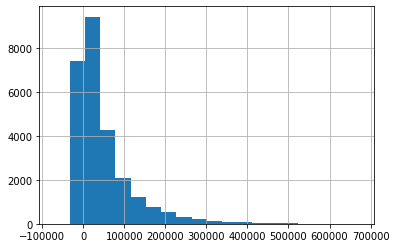

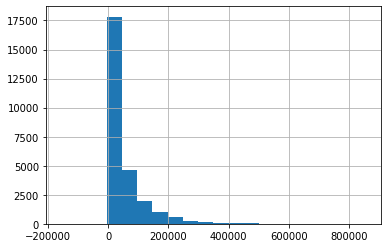

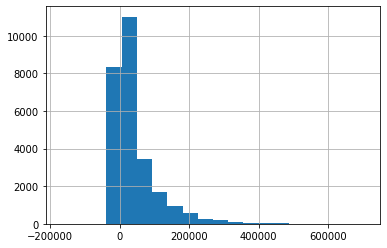

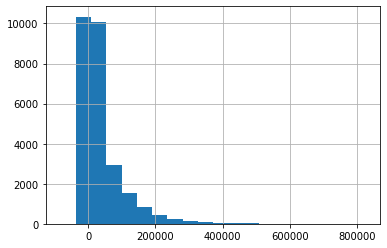

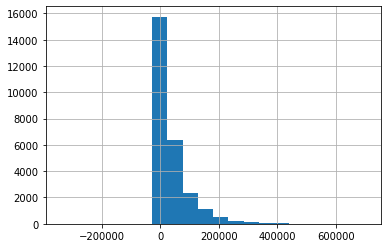

In [20]:
for i in df[bill_feats].columns:
    fig=plt.figure()
    fig=df[i].hist(bins=20)
    

________________________________________________________________________
**Next, obtain the `.describe()` summary of the payment amount features.**


In [21]:
df[pay_amt_feats].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,26664.000000,2.666400e+04,26664.000000,26664.000000,26664.000000,26664.000000
mean,5704.085771,5.881110e+03,5259.514964,4887.048717,4843.729973,5257.843047
std,16699.398632,2.121431e+04,17265.439561,15956.349371,15311.721795,17635.468185
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,8.020000e+02,390.000000,294.750000,242.750000,111.000000
50%,2114.500000,2.007000e+03,1822.000000,1500.000000,1500.000000,1500.000000
75%,5027.000000,5.000000e+03,4556.250000,4050.500000,4082.750000,4015.000000
max,873552.000000,1.227082e+06,889043.000000,621000.000000,426529.000000,528666.000000


    Does this make sense?

_______________________________________________________________________________________
**Next, plot a histogram of the bill payment features similar to the bill amount features, 
but also apply some rotation to the x-axis labels with the `xrot` keyword argument 
so that they don't overlap. In any plotting function, you can include the `xrot=<angle>`
keyword argument to rotate x-axis labels by a given angle in degrees.**


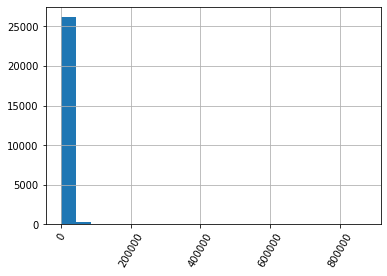

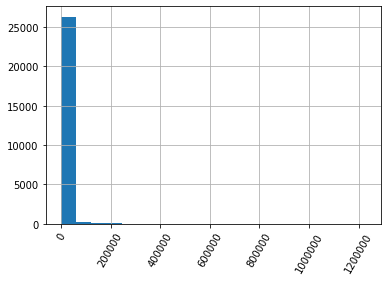

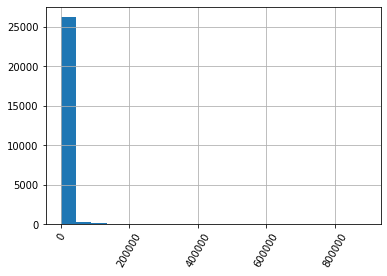

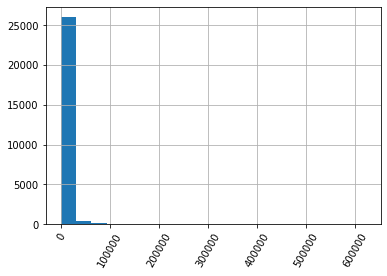

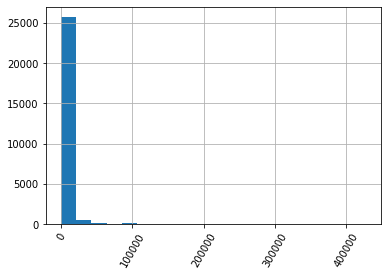

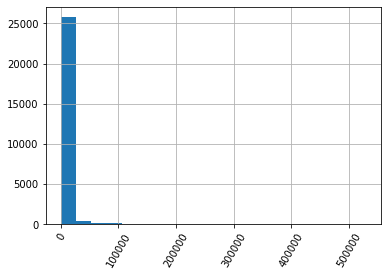

In [23]:
for i in df[pay_amt_feats].columns:
    fig=plt.figure()
    fig=df[i].hist(bins=20,xrot=60)
    

    Consider these results.

______________________________________________________________________________________________
**Then, use a Boolean mask to see how many of the payment amount data are exactly equal to 0. Review the results of the generated mask using `.head()` and `.sum()`.**



In [29]:
# Create Boolean mask
mask=df[pay_amt_feats]==0

In [30]:
# Use `.head()`
mask.head()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,
798fc410-45c1,True,False,True,True,True,True
8a8c8f3b-8eb4,True,False,False,False,True,False
85698822-43f5,False,False,False,False,False,False
0737c11b-be42,False,False,False,False,False,False
3b7f77cc-dbc0,False,False,False,False,False,False


In [31]:
# Use `.sum()`
mask.sum()

PAY_AMT1    4656
PAY_AMT2    4833
PAY_AMT3    5293
PAY_AMT4    5697
PAY_AMT5    5981
PAY_AMT6    6373
dtype: int64

     Does this make sense given the histogram in the previous step?

_______________________________________________________________________________________________________________________________
**Finally, ignoring the payments of 0 using the mask you created in the previous step, use pandas `.apply()` and NumPy's `np.log10()` to plot histograms of logarithmic transformations of the non-zero payments.**
> Hint: You can use `.apply()` to apply any function, including `log10`, to all the elements of a DataFrame or a column using the following syntax: `.apply(<function_name>)`.

In [33]:
import numpy as np

In [34]:
a=pd.DataFrame(np.ma.masked_array(df[pay_amt_feats],mask),columns=df[pay_amt_feats].columns,index=df[pay_amt_feats].index).dropna()

In [35]:
a

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,
85698822-43f5,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
0737c11b-be42,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
3b7f77cc-dbc0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
ceae2946-47e4,2500.0,1815.0,657.0,1000.0,1000.0,800.0
d3b8ce26-9c89,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0
...,...,...,...,...,...,...
33170a20-8592,6000.0,7000.0,4228.0,1505.0,2000.0,2000.0
62c53ee3-f0cf,2000.0,111784.0,4000.0,3000.0,2000.0,2000.0
ecff42d0-bdc6,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0


In [39]:
a=a.apply(lambda x :np.log10(x))

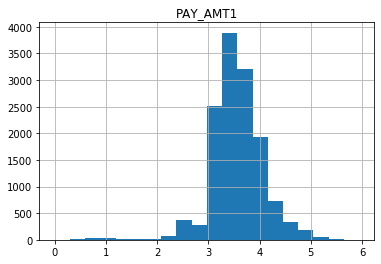

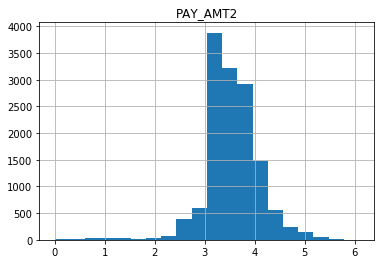

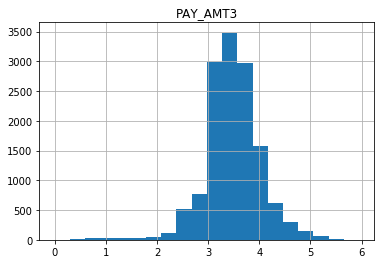

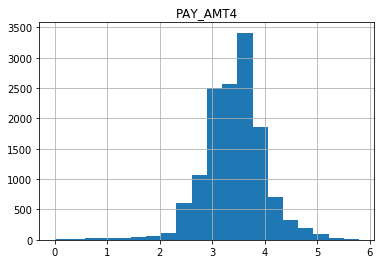

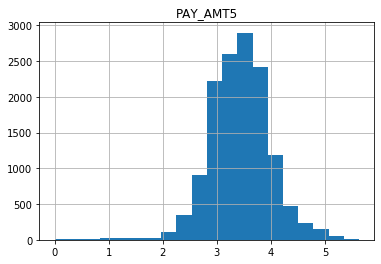

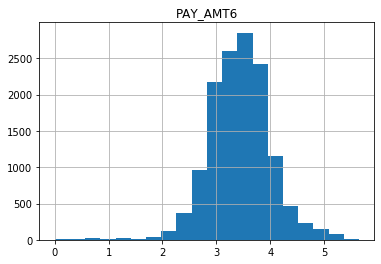

In [40]:

for i in a.columns:
    fig=plt.figure()
    fig=a[i].hist(bins=20)
    fig.set_title(i)